In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('./datasets/data.csv', encoding='CP949')
target = pd.read_csv('./datasets/OECD신용등급.csv', encoding='CP949')

In [3]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='left')
datasets.columns = ['국가별', '시점', '국내총생산', '고용률', '국민부담률', '경제활동참가율', '무역의존도_수출',
       '무역의존도_수입', '수출', '수입', '외환보유액', '부채비율', '실업률', '평균근로자세금', '디플레이터',
       'GDP_성장률', '신용등급']
datasets['수입'] = datasets['수입'].astype(float)
datasets['무역의존도_수입'] = datasets['무역의존도_수입'].astype(float)
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        116 non-null    int64  
 1   국내총생산     116 non-null    int64  
 2   고용률       116 non-null    float64
 3   국민부담률     116 non-null    float64
 4   경제활동참가율   116 non-null    float64
 5   무역의존도_수출  116 non-null    float64
 6   무역의존도_수입  116 non-null    float64
 7   수출        116 non-null    float64
 8   수입        116 non-null    float64
 9   외환보유액     116 non-null    float64
 10  부채비율      116 non-null    float64
 11  실업률       116 non-null    float64
 12  평균근로자세금   116 non-null    float64
 13  디플레이터     116 non-null    float64
 14  GDP_성장률   116 non-null    float64
 15  신용등급      116 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 14.6 KB


In [4]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,국내총생산,고용률,국민부담률,경제활동참가율,무역의존도_수출,무역의존도_수입,수출,수입,외환보유액,부채비율,실업률,평균근로자세금,디플레이터,GDP_성장률,신용등급
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,1.160000e+02,1.160000e+02,1.160000e+02,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1.689655,33346.146552,65.972414,34.313793,60.153448,37.006552,37.020345,2.217822e+05,2.229416e+05,8.167653e+04,73.539026,8.257759,38.507759,95.595690,3.329310,16.979940
std,1.058414,20702.131682,7.047338,6.950307,5.940245,22.166097,21.632006,2.805340e+05,3.268235e+05,1.823440e+05,41.213343,4.170646,8.705592,13.460676,3.148085,3.344374
min,0.000000,4076.000000,46.300000,11.400000,48.100000,7.440000,2.240000,3.092000e+03,3.919000e+03,2.790000e+02,6.788000,2.600000,14.700000,58.200000,-5.500000,3.900000
25%,1.000000,16641.000000,60.650000,30.500000,57.025000,20.292500,22.902500,4.842350e+04,4.620275e+04,9.268750e+03,45.829500,5.100000,32.825000,87.700000,1.800000,14.500000
50%,2.000000,30719.000000,66.100000,33.100000,59.650000,31.785000,29.410000,1.204630e+05,8.910150e+04,3.073500e+04,63.252000,7.450000,38.800000,100.000000,2.950000,18.000000
75%,3.000000,44260.500000,71.575000,39.250000,63.125000,51.107500,50.787500,3.073575e+05,3.133178e+05,7.170775e+04,101.067500,9.925000,43.775000,103.700000,4.200000,20.000000
max,3.000000,104965.000000,83.800000,48.000000,81.400000,146.180000,137.700000,1.503400e+06,2.248800e+06,1.233153e+06,234.073000,24.900000,57.100000,143.100000,25.200000,20.000000


In [5]:
x_train, x_test, y_train, y_test = train_test_split(datasets.iloc[:,:15], datasets.iloc[:,15], test_size=0.2, random_state=42)

In [20]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

In [21]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse = mean_squared_error(pred, y_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(pred, y_test)
    print('alpha : {0}\nmse : {1}\nrmse : {2}\nr2 : {3}\n'.format(alpha, mse, rmse, r2))

alpha : 100
mse : 3.7223645821344014
rmse : 1.9293430441822421
r2 : 0.3208833891954277

alpha : 10
mse : 4.805289763914533
rmse : 2.1920971155299056
r2 : 0.19786847493861193

alpha : 1
mse : 5.2829216404025345
rmse : 2.2984607110852546
r2 : 0.4297672351229219

alpha : 0.1
mse : 3.9510400329275037
rmse : 1.9877223228930905
r2 : 0.5970241127179088

alpha : 0.01
mse : 3.809305194578542
rmse : 1.9517441416790628
r2 : 0.6286692328295221

alpha : 0.001
mse : 3.794030252781546
rmse : 1.9478270592589955
r2 : 0.6309721710613918

alpha : 0.0001
mse : 3.7926749187540985
rmse : 1.9474791189520104
r2 : 0.6311913119524948



In [27]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(pred, y_test)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lasso.coef_} \nintercept : {lasso.intercept_}')

mse : 3.809305194578542 
rmse : 1.9517441416790628 
r2 : 0.6286692328295221 
coef : [-1.53213592e+00  5.16633278e-05  2.95778354e-01  1.30634083e-01
 -1.73833327e-01  2.85597991e-03 -9.02115668e-03  1.69985161e-06
  2.86601845e-06 -3.58709435e-07 -2.20743514e-02  2.59811269e-04
 -4.85557727e-02  5.24588287e-02  2.07621681e-02] 
intercept : 1.9520481313661566


<AxesSubplot:>

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


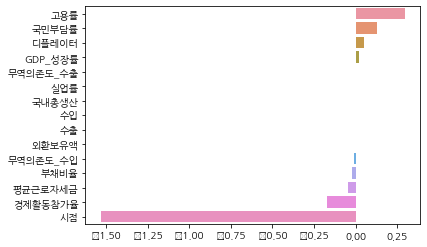

In [25]:
coef_ = pd.Series(lasso.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [28]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)


lasso = Lasso(alpha=0.01)
lasso.fit(x_train_ss, y_train)
pred = lasso.predict(x_test_ss)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lasso.coef_} \nintercept : {lasso.intercept_}')

mse : 4.147489428834109 
rmse : 2.0365385900674973 
r2 : 0.5638153896645423 
coef : [-1.60899908  1.13754666  1.98112547  0.89892997 -0.89405905 -0.
 -0.12593484  0.41040931  0.70670181 -0.03745061 -0.93787836 -0.02998367
 -0.33687774  0.68812902  0.04647152] 
intercept : 16.93032263619566


<AxesSubplot:>

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


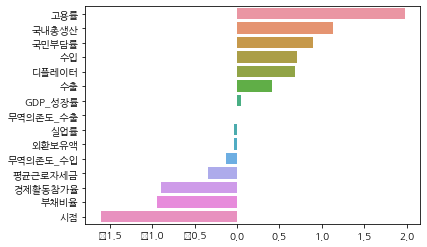

In [29]:
coef_ = pd.Series(lasso.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)